In [1]:
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
import math
from matplotlib.animation import FuncAnimation
import datetime
import csv
from postgis import Polygon,MultiPolygon
from postgis.psycopg import register

In [2]:
def animate(i):
    ax.set_title(datetime.datetime.utcfromtimestamp(ts_i+i*10))
    scat.set_offsets(offsets[i])
    scat.set_facecolors(taxis_colors[i])

In [3]:
scale=1/3000000
conn = None
conn = psycopg2.connect(database="lucparada", user="lucparada", password='', host="127.0.0.1", port="9876")

ts_i = 1570665600
ts_f = 1570667000

register(conn)
# taxis_infection = creatTaxis(conn)

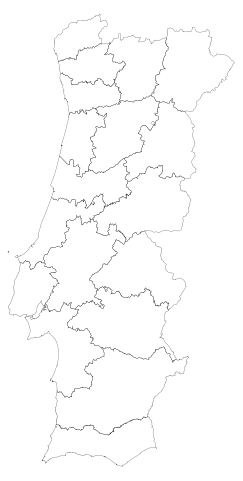

In [4]:
xs_min, xs_max, ys_min, ys_max = -120000, 165000, -310000, 285000
width_in_inches = (xs_max-xs_min)/0.0254*1.1
height_in_inches = (ys_max-ys_min)/0.0254*1.1
fig, ax = plt.subplots(figsize=(width_in_inches*scale, height_in_inches*scale))
ax.axis('off')
ax.set(xlim=(xs_min, xs_max), ylim=(ys_min, ys_max))
cursor_psql = conn.cursor()
sql = "select distrito,st_union(st_simplify(proj_boundary,100,FALSE)) from cont_aad_caop2018 group by distrito;"
cursor_psql.execute(sql)
results = cursor_psql.fetchall()
xs , ys = [],[]
for row in results:
    geom = row[1]
    if type(geom) is MultiPolygon:
        for pol in geom:
            xys = pol[0].coords
            xs, ys = [],[]
            for (x,y) in xys:
                xs.append(x)
                ys.append(y)
            ax.plot(xs,ys,color='black',lw='0.2')
    if type(geom) is Polygon:
        xys = geom[0].coords
        xs, ys = [],[]
        for (x,y) in xys:
            xs.append(x)
            ys.append(y)
        ax.plot(xs,ys,color='black',lw='0.2')
        #
offsets = []
inf = []
taxis_colors = []

In [7]:

with open('offsets3.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    i = 0
    for row in reader:
        taxis_frame = ['green' for ids in range(len(row))]
        ids = 0
        l = []
        for j in row:
            x,y = j.split()
            x = float(x)
            y = float(y)
            if (x != 0) or (y != 0):
                if len(inf) <= 10:
                    print("inf: ",str(inf))
                    inf.append(ids)

#                 if ids not in inf:
#                     for taxi_inf in inf:
#                         x2,y2 = row[taxi_inf].split()
#                         x2 = float(x2)
#                         y2 = float(y2)
#                         if np.sqrt(((x-x2)**2)+((y-y2)**2)) <= 100:
#                             inf.append(ids)
            ids += 1
            l.append([x, y])

        for taxi_inf in inf:
            taxis_frame[taxi_inf] = 'red'
            #print("l: ", str(l))

        offsets.append(l)
        taxis_colors.append(taxis_frame)
        i += 1

x,y = [],[]

for i in offsets[0]:
    print("i: ", i)
    x.append(i[0])
    y.append(i[1])
    #id = i[2]

    #color = 'green'
    #if id in inf:
    #    color = 'red'

    scat = ax.scatter(x,y,s=2)
    anim = FuncAnimation(
        fig, animate, interval=10, frames=len(offsets)-1, repeat = False)
    plt.draw()
    plt.show()

KeyboardInterrupt: 